Found 720 images belonging to 4 classes.
Found 179 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


Epoch 1/10
45/45 [==============================] - 29s 385ms/step - loss: 0.8790 - accuracy: 0.6056 - val_loss: 0.5610 - val_accuracy: 0.8352
Epoch 2/10
45/45 [==============================] - 10s 216ms/step - loss: 0.5972 - accuracy: 0.7542 - val_loss: 0.4604 - val_accuracy: 0.8239
Epoch 3/10
45/45 [==============================] - 10s 214ms/step - loss: 0.5153 - accuracy: 0.8139 - val_loss: 0.4571 - val_accuracy: 0.8011
Epoch 4/10
45/45 [==============================] - 10s 210ms/step - loss: 0.4275 - accuracy: 0.8403 - val_loss: 0.4798 - val_accuracy: 0.8125
Epoch 5/10
45/45 [==============================] - 10s 215ms/step - loss: 0.3622 - accuracy: 0.8694 - val_loss: 0.3269 - val_accuracy: 0.8864
Epoch 6/10
45/45 [==============================] - 10s 219ms/step - loss: 0.3814 - accuracy: 0.8667 - val_loss: 0.3507 - val_accuracy: 0.8864
Epoch 7/10
45/45 [==============================] - 9s 203ms/step - loss: 0.3404 - accuracy: 0.8861 - val_loss: 0.3320 - val_accuracy: 0.8864


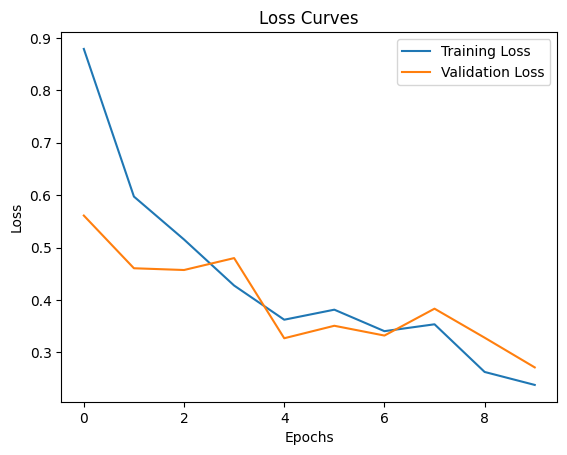

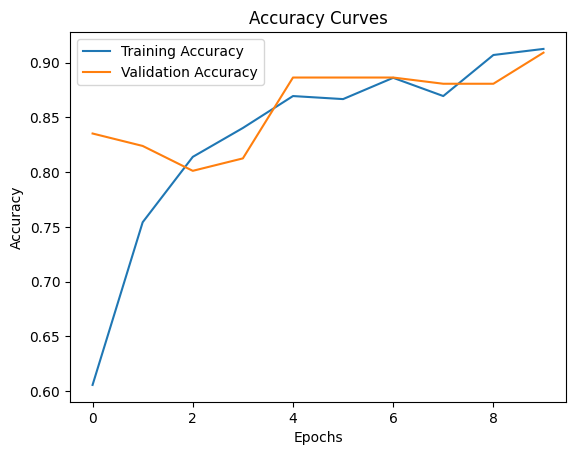

224/224 [==============================] - 3s 14ms/step - loss: 0.2792 - accuracy: 0.9241
Test accuracy: 0.9241071343421936


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

train_dir = '../../datasets/dataset2/train'
test_dir = '../../datasets/dataset2/test'
val_dir = '../../datasets/dataset2/validation'
batch_size = 16
img_height, img_width = 64, 64
input_shape = (img_height, img_width, 3)

# Define the data generators for training and testing
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir, # path to the training dataset
        target_size=(img_height, img_width), # resize images to this size
        batch_size=batch_size,
        class_mode='categorical') # output class labels as one-hot vectors

# Set up the validation data generator
validation_generator = validation_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
        test_dir,  # path to the testing dataset
        target_size=(img_height, img_width),
        batch_size=1, # batch size of 1 to test one image at a time
        class_mode='categorical')

# Define the model architecture
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=1e-4),
              metrics=['accuracy'])

# Calculate the steps per epoch and validation steps
steps_per_epoch = train_generator.samples // batch_size
validation_steps = validation_generator.samples // batch_size

# Train the model

history = model.fit(
    train_generator,
    epochs=10,
    steps_per_epoch=steps_per_epoch,
    validation_data=validation_generator,
    validation_steps=validation_steps
)

# Plot the loss curves for training and validation datasets
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the accuracy curves for training and validation datasets
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples/test_generator.batch_size)
print('Test accuracy:', test_acc)
